[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 10.26 

Analysis of student grades in two schools in Portugal\
Topics: permutation test, nonparametric testing, p value, median

Author: Carlos Fernandez-Granda\
Data source: https://archive.ics.uci.edu/dataset/320/student+performance

Median grade 12.0
Median grade in Gabriel Pereira 13.0
Median grade in Mousinho da Silveira 11.0


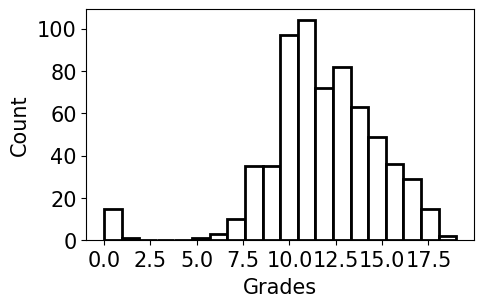

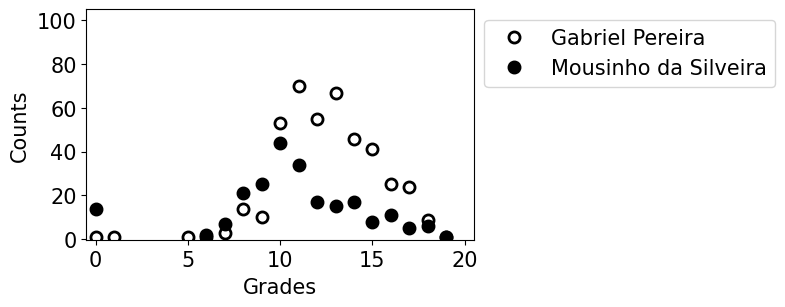

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
import random
import time

data = pd.read_csv ("../data/student_grades/student-por.csv", encoding='latin-1',sep=";")

font_size = 15
font_size_legend = 15
font_size_ticks = 15

grades = np.copy(data["G3"])

nbins = 20
plt.figure(figsize=(5,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(grades,bins=nbins,color='white', edgecolor='black',
          linewidth=2)
plt.ylabel("Count",fontsize=font_size,labelpad=5)
plt.xlabel('Grades',fontsize=font_size,labelpad=5)

grades_GP = grades[data["school"]== "GP"]
grades_MS = grades[data["school"]== "MS"]

vals_GP, counts_GP = np.unique(grades_GP, return_counts=True)
vals_MS, counts_MS = np.unique(grades_MS, return_counts=True)

plt.figure(figsize=(5,3))
plt.xticks(np.arange(0,21,5),fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(vals_GP,counts_GP, "o",markersize=8,markerfacecolor='white',markeredgecolor="black",
         markeredgewidth=2,label="Gabriel Pereira")
plt.plot(vals_MS,counts_MS, "o",markersize=8,markerfacecolor='black',markeredgecolor="black",
         markeredgewidth=2,label="Mousinho da Silveira")
plt.ylabel("Counts",fontsize=font_size,labelpad=5)
plt.xlabel('Grades',fontsize=font_size,labelpad=5)
plt.xlim([-0.5,20.5])
plt.ylim([-0.5,105])
plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

print("Median grade",np.median(grades))

print("Median grade in Gabriel Pereira",np.median(grades[data["school"]== "GP"]))
print("Median grade in Mousinho da Silveira",np.median(grades[data["school"]== "MS"]))

In [7]:
# Permutation test
m = int(1e6)
n_GP = np.sum(data["school"]== "GP")
n_MS = np.sum(data["school"]== "MS")
grades_copy = np.copy(grades)
verbose = True

test_statistic_samples = np.zeros(m)
median_1 = np.zeros(m)
median_2 = np.zeros(m)
start = time.time()
for ind in range(m):
    random.shuffle(grades_copy)
    test_statistic_samples[ind] = np.abs(np.median(grades_copy[:n_GP])-np.round(np.median(grades_copy[n_GP:])))
    if verbose and np.mod(ind,1e5)==0:
        end = time.time()
        print(ind,end - start)


0 0.0014410018920898438
100000 17.40947675704956
200000 34.54409170150757
300000 51.644059896469116
400000 69.04381990432739
500000 86.19816875457764
600000 103.34940385818481
700000 120.75674700737
800000 137.91516065597534
900000 155.24946475028992


p value:  0.001


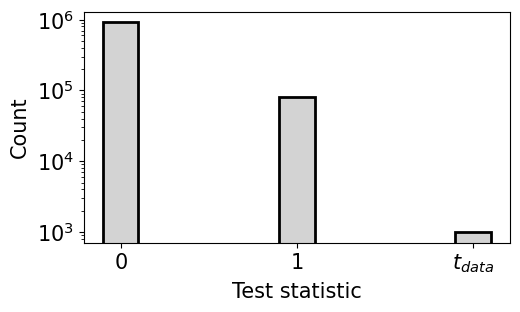

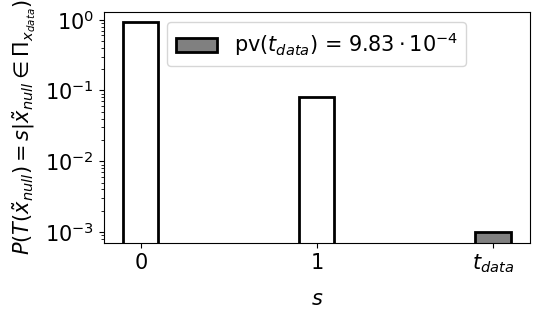

In [11]:
t_data = np.abs(np.median(grades[data["school"]== "GP"]) - np.median(grades[data["school"]== "MS"]))
vals, counts = np.unique(test_statistic_samples, return_counts=True)
prob = counts/len(test_statistic_samples)
print("p value: ",round(np.sum(prob[vals >= t_data]),3))

plt.figure(figsize=(5.5,3))
plt.xticks(np.arange(-2,3,1),[r'$-2$',r'$-1$',r'$0$',r'$1$',r'$t_{data}$'],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.bar(vals,counts, width = 0.2, color = "lightgray", edgecolor="black",linewidth = 2,log=True)
plt.ylabel("Count",fontsize=font_size,labelpad=5)
plt.xlabel('Test statistic',fontsize=font_size,labelpad=5)

plt.figure(figsize=(5.5,3))
plt.xticks(np.arange(0,3,1),[r'$0$',r'$1$',r'$t_{data}$'],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.bar(vals[vals < t_data],prob[vals < t_data], width = 0.2, color = "white", edgecolor="black",linewidth = 2
        ,log=True)
plt.bar(vals[vals >= t_data],prob[vals >= t_data], width = 0.2, color = "gray", edgecolor="black",log=True,
        linewidth = 2, label = r"pv$(t_{data})$ = $9.83 \cdot 10^{-4}$")
plt.ylabel(r"$P(T(\tilde{x}_{null}) = s| \tilde{x}_{null} \in \Pi_{x_{data}})$",fontsize=font_size_ticks,labelpad=5)
plt.xlabel(r'$s$',labelpad = 10,fontsize=font_size)
plt.legend(fontsize=font_size,loc="upper center")